## CONOCIENDO BEST COMPANY 👀👀

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import warnings

In [2]:
#Quitar advertencias en los codigos
warnings.filterwarnings('ignore')

# Ver Datasets completos
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

pd.options.display.float_format = '{:.0f}'.format

In [3]:
df_people = pd.read_excel('/content/drive/MyDrive/PROYECTOS EMPRESA/01 Colaboradores.xlsx') 
df_jobs = pd.read_csv('/content/drive/MyDrive/PROYECTOS EMPRESA/02 CARGOS.txt', delimiter = "\t")
df_areas = pd.read_csv('/content/drive/MyDrive/PROYECTOS EMPRESA/03  AREAS.csv',encoding='latin-1', delimiter = ";" )
df_hours = pd.read_csv('/content/drive/MyDrive/PROYECTOS EMPRESA/04 HORAS_CONTRATADAS.csv', delimiter = ";")
df_absenteeism  = pd.read_excel('/content/drive/MyDrive/PROYECTOS EMPRESA/05 Ausentismo_Incapacidades.xlsx')

In [4]:
print(df_people.columns)
print("----------------------------------------------------")
print(df_jobs.columns)
print("----------------------------------------------------")
print(df_areas.columns)
print("----------------------------------------------------")
print(df_hours.columns)
print("----------------------------------------------------")
print(df_absenteeism.columns)

Index(['id_colaborador', 'genero', 'edad'], dtype='object')
----------------------------------------------------
Index(['cargo', 'codigo_cargo'], dtype='object')
----------------------------------------------------
Index(['codigo_area', 'area'], dtype='object')
----------------------------------------------------
Index(['id_colab_periodo', 'id_colaborador', 'periodo', 'horas_contratadas',
       'codigo_cargo', 'codigo_area'],
      dtype='object')
----------------------------------------------------
Index(['id_colab_periodo', 'id_colaborador', 'periodo', 'h_incapacidades',
       'h_ausentismo'],
      dtype='object')


# VISTA DEL MODELO 🧐🧐

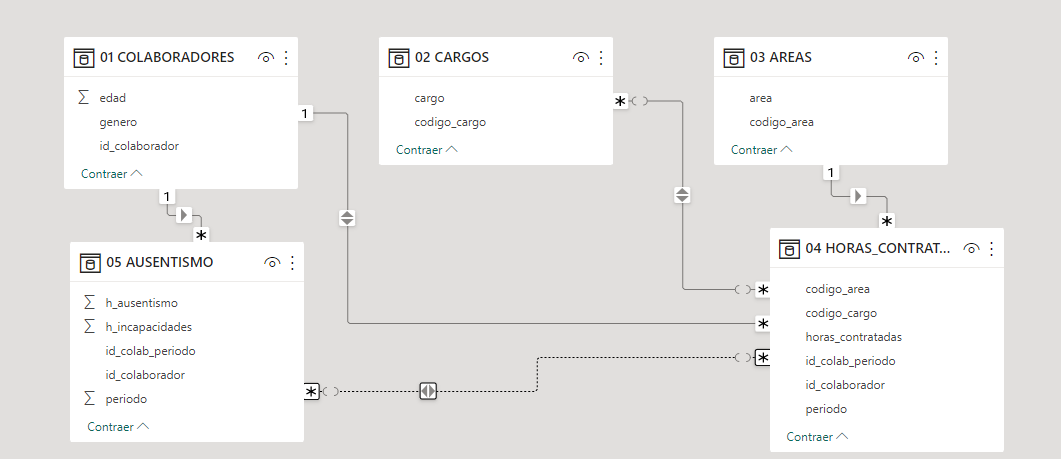

### UNIENDO TABLAS


In [5]:
df_absen_hours = pd.merge(df_absenteeism,df_hours,how='left',left_on=['id_colab_periodo'], right_on=['id_colab_periodo'])
df_absen_hours_people = pd.merge(df_absen_hours,df_people,how='left',left_on=['id_colaborador_x'], right_on=['id_colaborador'])
df_absen_hours_people_jobs=pd.merge(df_absen_hours_people,df_jobs,how='left',left_on=['codigo_cargo'], right_on=['codigo_cargo'])
df_absen_hours_people_jobs_areas=pd.merge(df_absen_hours_people_jobs,df_areas,how='left',left_on=['codigo_area'], right_on=['codigo_area'])
df_best_company=df_absen_hours_people_jobs_areas

In [21]:
df_best_company

,id_colab_periodo,id_colaborador_x,periodo_x,h_incapacidades,h_ausentismo,id_colaborador_y,periodo_y,horas_contratadas,codigo_cargo,codigo_area,id_colaborador,genero,edad,cargo,area
0,101434-201901,101434,201901,0,0,101434,201901,50,4L1081,A0240,101434,M,36,ANALISTA 3,REGISTRO Y SUBSIDIO - 260 / CENTRO DE SERVICI...
1,101463-201901,101463,201901,0,5,101463,201901,113,4L1081,A0128,101463,H,50,ANALISTA 3,FOSFEC - 20111 / CENTRO DE SERVICIOS Y DESARR...
2,101484-201901,101484,201901,0,0,101484,201901,72,4L1081,A0245,101484,M,29,ANALISTA 3,SUBSIDIO PARA NO AFILIADOS - 21304 / CENTRO D...
3,101675-201901,101675,201901,0,0,101675,201901,129,4L1081,A0128,101675,H,38,ANALISTA 3,FOSFEC - 20111 / CENTRO DE SERVICIOS Y DESARR...
4,101731-201901,101731,201901,0,0,101731,201901,188,4L1081,A0240,101731,H,24,ANALISTA 3,REGISTRO Y SUBSIDIO - 260 / CENTRO DE SERVICI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46395,100743-202006,100743,202006,0,6,100743,202006,107,5A1014,A0090,100743,M,54,ASESOR COMERCIAL 1,DIAGN?STICA - 30402002 / CHIA
46396,100745-202006,100745,202006,4,3,100745,202006,91,4K1171,A0210,100745,M,29,TECNICO 4,PREVENTIVA - 30402001 / CALLE 98
46397,100774-202006,100774,202006,0,3,100774,202006,145,5A1014,A0090,100774,M,47,ASESOR COMERCIAL 1,DIAGN?STICA - 30402002 / CHIA
46398,100797-202006,100797,202006,0,6,100797,202006,109,5A1014,A0090,100797,M,51,ASESOR COMERCIAL 1,DIAGN?STICA - 30402002 / CHIA


## 1. Distribución poblacional de trabajadores por edad y género.

In [7]:
distribucion_e_g = df_best_company.groupby(['id_colaborador','genero','edad']).size()
distribucion_e_g = pd.DataFrame(distribucion_e_g).reset_index()
distribucion_e_g = (
    distribucion_e_g
    .assign(is_genero = lambda df : df['genero'].replace(['M',
    'H'],[1,0]))
)
distribucion_e_g  

,id_colaborador,genero,edad,0,is_genero
0,100000,M,34,19,1
1,100001,M,28,18,1
2,100002,M,52,19,1
3,100003,H,28,19,0
4,100004,M,50,18,1
...,...,...,...,...,...
2441,102447,M,57,19,1
2442,102448,M,39,18,1
2443,102449,M,31,18,1
2444,102450,H,47,19,0


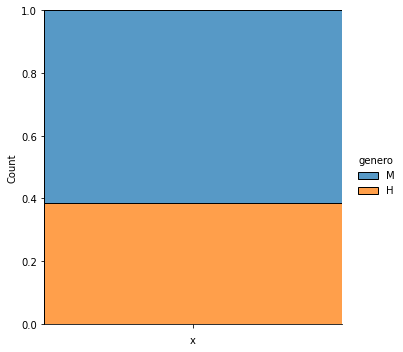

In [8]:
distribucion_e_g['x'] = ''
distribucion_e_g.pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='genero',
                multiple='fill'
            )
        )
    )

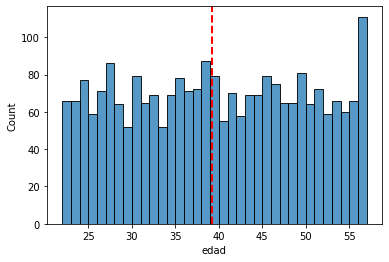

In [10]:
sns.histplot(
    data=distribucion_e_g,
    x='edad',
    binwidth=1
)


plt.axvline(
    x =distribucion_e_g['edad'].mean(),
    color='red',
    linestyle = 'dashed',
    linewidth = 2
)

### Número de colaboradores únicos por Cargo

In [16]:
distribucion_c = df_best_company.groupby(['id_colaborador']\
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'cantidad_cargos': len(x['codigo_cargo'].unique())
                                }))
distribucion_c = pd.DataFrame(distribucion_c).reset_index()  
distribucion_c = distribucion_c.sort_values(by=['cantidad_cargos'], ascending=False)      
distribucion_c

,id_colaborador,cantidad_cargos
0,100000,4
804,100808,4
808,100812,4
809,100813,4
810,100814,4
...,...,...
2136,102141,1
1490,101495,1
1538,101543,1
957,100961,1


### Número de colaboradores únicos por area


In [17]:
distribucion_a = df_best_company.groupby(['id_colaborador']\
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'cantidad_areas': len(x['codigo_area'].unique())
                                }))
distribucion_a = pd.DataFrame(distribucion_a).reset_index()
distribucion_a = distribucion_a.sort_values(by=['cantidad_areas'], ascending=False)
distribucion_a = distribucion_a.reset_index(drop=True)
distribucion_a

,id_colaborador,cantidad_areas
0,100000,5
1,100704,5
2,100708,5
3,100710,5
4,100712,5
...,...,...
2441,100387,1
2442,101898,1
2443,101495,1
2444,102243,1


### Comportamiento del ausentismo (ausentismos + incapacidades) por mes x cargo

In [18]:
comportamiento_ausentis = df_best_company.groupby(['cargo','periodo_x']\
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'h_ausentismo': x['h_incapacidades'].unique().sum() + x['h_ausentismo'].unique().sum()
                                }))
comportamiento_ausentis = pd.DataFrame(comportamiento_ausentis).reset_index()
comportamiento_ausentis = comportamiento_ausentis.sort_values(by=['h_ausentismo'], ascending=False)
comportamiento_ausentis = comportamiento_ausentis.reset_index(drop=True)
comportamiento_ausentis

,cargo,periodo_x,h_ausentismo
0,TECNICO 4,202005,2903
1,TECNICO 4,202006,2898
2,TECNICO 4,201911,2427
3,TECNICO 4,202004,2375
4,TECNICO 4,201909,2370
...,...,...,...
331,ANALISTA 2,201910,0
332,TECNICO 2,202002,0
333,ASESOR EMPRESARIAL,201903,0
334,ANALISTA 2,201911,0


#### Top de colaboradores con mayor % de ausentismo (ausentismos + incapacidades)


In [19]:
ausentismo_tra = df_best_company.groupby(['id_colaborador']\
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'h_ausentismo': x['h_incapacidades'].sum() + x['h_ausentismo'].sum()
                                }))
ausentismo_tra = pd.DataFrame(ausentismo_tra).reset_index()
ausentismo_tra = ausentismo_tra.sort_values(by=['h_ausentismo'], ascending=False)
ausentismo_tra = ausentismo_tra.reset_index(drop=True)
ausentismo_tra.head(10)

,id_colaborador,h_ausentismo
0,101043,3032
1,101581,2728
2,101870,1872
3,101947,1848
4,101496,1272
5,101561,1248
6,101155,1220
7,101878,1044
8,101299,976
9,101781,935


## CUADRO FINAL

In [ ]:
df_best_company.to_excel('df_best_company.xlsx',index=False)